## Optional Lab - Regularization Cost and Gradient

### Goals
이 실습에서는 다음을 수행합니다.
* 정규화 항을 사용하여 이전 선형 로지스틱 비용 함수를 확장합니다.
* 정규화 항을 추가하여 과적합의 이전 예를 다시 실행합니다.

In [4]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from plt_overfit import overfit_example, output
from lab_utils_common import sigmoid
np.set_printoptions(precision=8)

### Adding regularization

<img align="Left" src="./images/C1_W3_LinearGradientRegularized.png"  style=" width:400px; padding: 10px; " >
<img align="Center" src="./images/C1_W3_LogisticGradientRegularized.png"  style=" width:400px; padding: 10px; " >

위 슬라이드는 선형 및 로지스틱 회귀에 대한 비용 및 기울기 함수를 보여줍니다.

Note:
* 비용
  * 비용 함수는 선형 회귀와 로지스틱 회귀 사이에서 크게 다르지만 방정식에 정규화를 추가하는 것은 동일합니다.
* 그라디언트
  * 선형 회귀와 로지스틱 회귀의 기울기 함수는 매우 유사합니다. $f_{wb}$구현에서만 다룹니다.

### Cost functions with regularization

정규화 선형 회귀의 비용 함수 방정식은 다음과 같습니다.

$J(\overrightarrow{w}, b)=\frac{1}{2m}\sum_{i=0}^{m-1}(f_{\overrightarrow{w}, b}(x^{(i)})-y^{(i)})^2+\frac{\lambda}{2m}\sum_{j=0}^{n-1}\omega^2_j$

차이점은 정규화 항인 *$\frac{\lambda}{2m}\sum_{j=0}^{n-1}\omega^2_j$* 입니다.

이 항을 포함하면 경사하강법을 사용하여 매개변수의 크기를 최소화할 수 있습니다. 이 예에서는 $b$ 매개변수가 정규화되지 않았습니다. 이는 표준 관행입니다.

아래 방정식 (1)과 (2)를 구현한 것입니다. 이는 모든 `m` 예제에 대한 `for 루프`를 사용한다는 _이 과정의 표준 패턴_ 임에 유의하세요.

In [5]:
def compute_cost_linear_reg(X, y, w, b, lambda_=1):
    """
    Compute the cost over all examples
    Args:
        X(nadrray (m, n)): Data, m examples with n features
        y(ndarray (m, )): target values
        w(ndarray (n, )): model parameters
        b(scalar): model parameter
        lambda_(scalar): Contrlos amount of regularization
    Returns:
        total_cost (scalar): cost
    """

    m=X.shape[0]
    n=len(w)
    cost=0.
    for i in range(m):
        f_wb_i=np.dot(X[i], w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)

    reg_cost=0
    for j in range(n):
        reg_cost=cost+reg_cost
    reg_cost=(lambda_/(2*m))*reg_cost

    total_cost=cost+reg_cost
    return total_cost

In [6]:
np.random.seed(1)
X_tmp=np.random.rand(5, 6)
y_tmp=np.array([0, 1, 0, 1, 0])
w_tmp=np.random.rand(X_tmp.shape[1]).reshape(-1)-0.5
b_tmp=0.5
lambda_tmp=0.7
cost_tmp=compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost: ", cost_tmp)

Regularized cost:  0.06777796235759101


### Cost function for regularized logistic regression

정규화된 **로지스틱** 회귀의 경우 비용 함수는 다음과 같은 형식입니다.

$J_{\overrightarrow{w}, b}=\frac{1}{m}\sum_{i=0}^{m-1}[-y^{(i)}log(f_{w, b}(x^{(i)}))-(1-y)log(1-f_{w, b}(x^{(i)}))]+\frac{\lambda}{2m}\sum_{j=0}^{n-1}\omega_j^2$

여기에서:

$f_{\overrightarrow{w}, b}(x^{(i)})=sigmoid(\overrightarrow{w}\cdot\overrightarrow{x}^{(i)}+b)$

이를 정규화가 적용되지 않은 비용 함수(이전 실습에서 구현함)와 비교해 보세요.

$J(\overrightarrow{w}, b)=\frac{1}{2m}\sum_{i=0}^{m-1}(f_{\overrightarrow{w}, b}(x^{(i)})-y^{(i)})^2+\frac{\lambda}{2m}\sum_{j=0}^{n-1}\omega^2_j$

위의 선형 회귀의 경우 마찬가지로 차이점은 $\frac{\lambda}{2m}\sum_{j=0}^{n-1}\omega^2_j$인 정규화 항 입니다.

이 항을 포함하면 경사하강법을 사용하여 매개변수의 크기를 최소화할 수 있습니다. 이 예에서는 $b$ 매개변수가 정규화되지 않았습니다. 이는 표준 관행입니다.

In [7]:
def compute_cost_logistic_reg(X, y, w, b, lambda_=-1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m, n=X.shape
    cost=0.
    for i in range(m):
        z_i=np.dot(X[i], w)+b
        f_wb_i=sigmoid(z_i)
        cost=cost+(-y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i))
    cost=cost/m

    reg_cost=0
    for j in range(n):
        reg_cost=reg_cost+(w[j]**2)
    reg_cost=(lambda_/(2*m))*reg_cost

    total_cost=cost+reg_cost
    return total_cost

In [8]:
np.random.seed(1)
X_tmp=np.random.rand(5, 6)
y_tmp=np.array([0, 1, 0, 1, 0])
w_tmp=np.random.rand(X_tmp.shape[1]).reshape(-1)-0.5
lambda_tmp=0.7
cost_tmp=compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp,b_tmp, lambda_tmp)

print("Regularized cost: ", cost_tmp)

Regularized cost:  0.6850849138741673


## Gradient descent with regularization
The basic algorithm for running gradient descent does not change with regularization, it is:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$
Where each iteration performs simultaneous updates on $w_j$ for all $j$.

What changes with regularization is computing the gradients.

### Computing the Gradient with regularization (both linear/logistic)
선형 회귀와 로지스틱 회귀의 그라디언트 계산은 $f_{\mathbf{w}b}$ 계산만 다를 뿐 거의 동일합니다.
 
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$
 
* m은 데이터 세트의 훈련 예시 수입니다.
* $f_{\mathbf{w},b}(x^{(i)})$는 모델의 예측이고 $y^{(i)}$는 타겟입니다.
       
* For a  <span style="color:blue"> **linear** </span> regression model  
    $f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b$  
* For a <span style="color:blue"> **logistic** </span> regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    
정규화를 추가하는 항은 <span style="color:blue">$\frac{\lambda}{m} w_j $</span>입니다.

### Gradient function for regularized linear regression

In [11]:
def compute_gradient_linear_reg(X, y, w, b, lambda_):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n=X.shape
    dj_dw=np.zeros((n, ))
    dj_db=0.

    for i in range(m):
        err=(np.dot(X[i], w)+b)-y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err*X[i, j]
        dj_db=dj_db+err
    dj_dw=dj_dw/m
    dj_db=dj_db/m

    for j in range(n):
        dj_dw[j]=dj_dw[j]+(lambda_/m)*w[j]

    return dj_db, dj_dw

In [13]:
np.random.seed(1)
X_tmp=np.random.rand(5, 3)
y_tmp=np.array([0, 1, 0, 1, 0])
w_tmp=np.random.rand(X_tmp.shape[1])
b_tmp=0.5
lambda_tmp=0.7
dj_db_tmp, dj_dw_tmp=compute_gradient_linear_reg(X_tmp, y_tmp,w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}")
print(f"Regularized dj_dw: \n{dj_dw_tmp.tolist()}")

dj_db: 0.6648774569425726
Regularized dj_dw: 
[0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


### Gradient function for regularized logistic regression

In [14]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                            #(n,)
    dj_db = 0.0                                       #scalar

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw  

In [15]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]


### Rerun over-fitting example

Output()

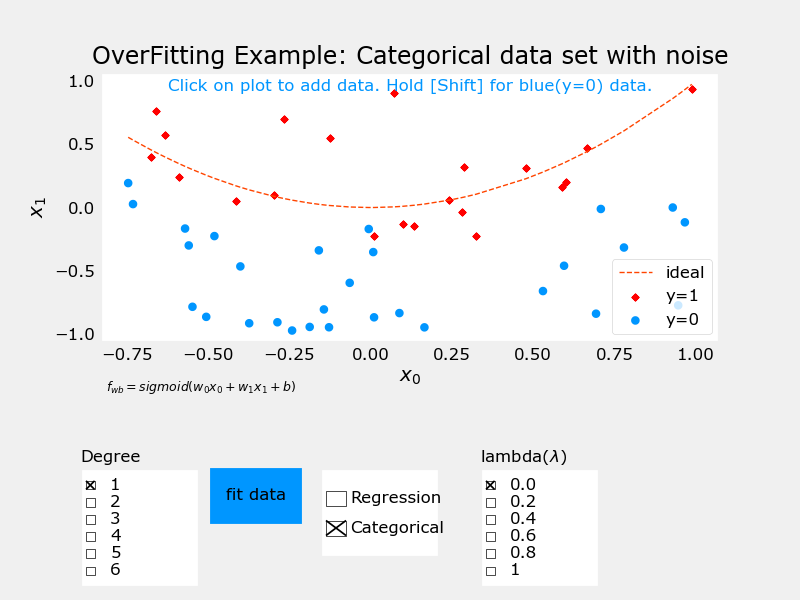

In [18]:
plt.close("all")
display(output)
ofit = overfit_example(True)

위 플롯에서 이전 예에 대한 정규화를 시도해 보세요. 특히:

* 범주형(로지스틱 회귀)
    * 차수를 6으로 설정하고 람다(lambda)를 0(정규화 없음)으로 설정하고 데이터를 맞춥니다.
    * 이제 람다를 1로 설정하고(정규화 증가) 데이터를 맞추고 차이점을 확인합니다.
* 회귀(선형 회귀)
    * 같은 과정을 시도해 보세요.